Episode: 500, Total Steps: 213317, Ep Step: 582, Raw Reward: 0.00, Epsilon: 0.10
Episode: 1000, Total Steps: 426066, Ep Step: 77, Raw Reward: 0.00, Epsilon: 0.10
Episode: 1500, Total Steps: 635573, Ep Step: 568, Raw Reward: 0.00, Epsilon: 0.10
Episode: 2000, Total Steps: 856430, Ep Step: 582, Raw Reward: 0.00, Epsilon: 0.10
Episode: 2500, Total Steps: 1068826, Ep Step: 647, Raw Reward: 0.00, Epsilon: 0.10
Episode: 3000, Total Steps: 1283010, Ep Step: 500, Raw Reward: 0.00, Epsilon: 0.10
Episode: 3500, Total Steps: 1499479, Ep Step: 583, Raw Reward: 0.00, Epsilon: 0.10
Episode: 4000, Total Steps: 1725878, Ep Step: 685, Raw Reward: 0.00, Epsilon: 0.10
Episode: 4500, Total Steps: 1963041, Ep Step: 128, Raw Reward: 0.00, Epsilon: 0.10

~~~~~~Interval Save: Model saved.

Episode: 5000, Total Steps: 2212674, Ep Step: 640, Raw Reward: 0.00, Epsilon: 0.10
Episode: 5500, Total Steps: 2461457, Ep Step: 381, Raw Reward: 0.00, Epsilon: 0.10
Episode: 6000, Total Steps: 2700521, Ep Step: 603, Raw Re

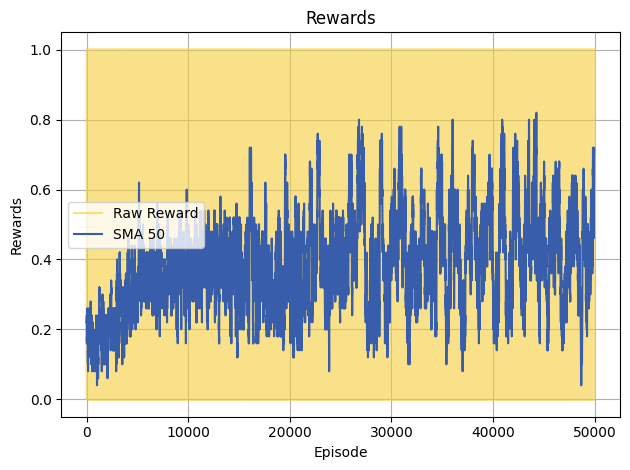

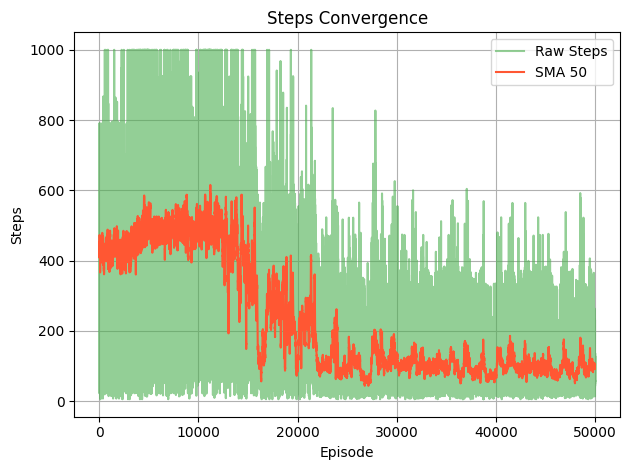

[[3.02421940e-01 3.10092228e-01 3.00919685e-01 3.38275591e-01]
 [3.02484591e-01 3.14210123e-01 3.11361819e-01 3.46572722e-01]
 [3.15774641e-01 3.14955413e-01 3.11423111e-01 3.70887053e-01]
 [3.29173706e-01 3.47601731e-01 3.87139727e-01 3.48475302e-01]
 [3.58108815e-01 3.54768435e-01 4.08454759e-01 3.54349704e-01]
 [3.92198126e-01 3.97859416e-01 4.32748716e-01 3.96830855e-01]
 [4.34058647e-01 4.29083467e-01 4.57720852e-01 4.26617811e-01]
 [4.65406500e-01 4.38665300e-01 4.44717907e-01 4.33957869e-01]
 [2.83943539e-01 2.81544599e-01 2.97832297e-01 2.85095498e-01]
 [2.88783084e-01 2.85180032e-01 2.89388994e-01 3.11218298e-01]
 [2.92420059e-01 2.89631192e-01 3.26041404e-01 3.00627939e-01]
 [1.79763438e-01 2.28573477e-01 2.78678250e-01 3.40737851e-01]
 [3.21007475e-01 3.38667227e-01 3.98383918e-01 3.38583869e-01]
 [3.76483098e-01 3.84646375e-01 4.31539164e-01 3.56954862e-01]
 [4.25461423e-01 4.32659480e-01 4.67039948e-01 4.16428003e-01]
 [4.57293792e-01 4.59482837e-01 4.86632606e-01 4.469875

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from agent.base_agent import BaseAgent
from utils import seed_everything

import heapq
import numpy as np

def get_next_state_and_action(current_state, next_state, map_size):
    """
    Get the next state's index and the direction value (action) based on current and next states.
    
    Args:
        current_state (tuple): Current state in (row, col) format.
        next_state (tuple): Next state in (row, col) format.
        map_size (int): Size of one dimension of the FrozenLake map (assumes square map).
        
    Returns:
        tuple: (next_state_index, action_value)
    """
    # 动作方向映射
    directions = {
        (-1, 0): 0,  # Up
        (1, 0): 1,   # Down
        (0, -1): 2,  # Left
        (0, 1): 3    # Right
    }
    
    # 当前状态和下一状态的行列差
    row_diff = next_state[0] - current_state[0]
    col_diff = next_state[1] - current_state[1]
    
    # 查找动作值
    action_value = directions.get((row_diff, col_diff))
    if action_value is None:
        raise ValueError("Invalid move: Current state and next state are not adjacent.")
    
    # 计算下一状态的编号
    next_state_index = next_state[0] * map_size + next_state[1]
    
    return next_state_index, action_value


# 定义A*算法
def a_star(env, start, goal):
    # 地图信息
    desc = env.unwrapped.desc.astype('str')
    nrows, ncols = desc.shape

    # 方向和动作的映射
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 上、下、左、右
    actions = {(-1, 0): 0, (1, 0): 1, (0, -1): 2, (0, 1): 3}

    # 检查是否是hole
    def is_hole(r, c):
        return desc[r][c] == 'H'

    # 计算垂直方向上hole的个数
    def vertical_holes_cost(prev, curr):
        if not prev:
            return 0
        pr, pc = prev
        cr, cc = curr
        if pr == cr:  # 水平移动
            vr1, vr2 = pr - 1, pr + 1
            cost = 0
            if 0 <= vr1 < nrows and is_hole(vr1, pc):
                cost += 1
            elif not(0 <= vr1 < nrows) and is_hole(vr2, pc):
                cost += 1.5
            if 0 <= vr2 < nrows and is_hole(vr2, pc):
                cost += 1
            elif not(0 <= vr2 < nrows) and is_hole(vr1, pc):
                cost += 1.5
            return cost
        else:
            vr1, vr2 = pc + 1, pc - 1
            cost = 0
            if 0 <= vr1 < ncols and is_hole(pr, vr1):
                cost += 1
            elif not(0 <= vr1 < ncols) and is_hole(pr, vr2):
                cost += 1.5
            if 0 <= vr2 < ncols and is_hole(pr, vr2):
                cost += 1
            elif not(0 <= vr2 < ncols) and is_hole(pr, vr1):
                cost += 1.5
            return cost

    # Heuristic函数：曼哈顿距离
    def heuristic(curr, goal):
        return abs(curr[0] - goal[0]) + abs(curr[1] - goal[1])

    # 优先队列（heapq）
    open_list = []
    heapq.heappush(open_list, (0, start, None))  # (总成本, 当前坐标, 前一个坐标)

    # 记录访问过的节点
    came_from = {}
    g_score = {start: 0}  # 从起点到当前位置的实际成本

    while open_list:
        _, current, prev = heapq.heappop(open_list)

        # 如果到达目标
        if current == goal:
            path = []
            total_cost= g_score[current]+vertical_holes_cost(prev, current)
            while current:
                path.append(current)
                current = came_from.get(current, None)
            
            return get_next_state_and_action(path[-1], path[-2], nrows)# 返回路径
        

        # 遍历邻居
        for dr, dc in directions:
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)

            # 检查边界和hole
            if not (0 <= nr < nrows and 0 <= nc < ncols) or is_hole(nr, nc):
                continue

            # 计算成本
            tentative_g_score = g_score[current] + vertical_holes_cost(prev, current)

            # 如果发现更优的路径
            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score, neighbor, current))

    return None  # 如果没有找到路径

def generate_prompt_Q_table(env):
    Q_table = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
            nrow= env.unwrapped.desc.shape[0]
            start = (state//nrow, state%nrow)
            goal = (nrow-1,nrow-1)
            if start == goal:
                continue
            next_state, prompt_action = a_star(env, start, goal)
            Q_table[state] = prompt_action
            env.reset()
    return [int(i) for i in Q_table]

# Q-Learning Agent Class inheriting from Agent
class QLearningAgent(BaseAgent):
    def __init__(self, env, hyperparams):
        """
        Q-Learning Agent class for interacting with the environment and learning
        """
        super(QLearningAgent, self).__init__(env, hyperparams)
        self.Q_table = np.zeros((self.state_dim, self.num_actions))
        
        # Additional hyperparameters
        self.learning_rate = hyperparams['learning_rate']
        self.discount = hyperparams['discount_factor']
        self.epsilon = hyperparams['epsilon_max']
        self.epsilon_min = hyperparams['epsilon_min']
        self.epsilon_decay = hyperparams['epsilon_decay']
        self.mapsize=hyperparams['map_size']
        self.alpha = hyperparams['alpha']
        self.alpha_decay = hyperparams['alpha_decay']
        self.prompt_S = generate_prompt_Q_table(env)

    def select_action(self, state):
        """
        Select an action using epsilon-greedy policy
        """
        if np.random.uniform(0, 1) < self.epsilon:
            # print("random",state,)
            return self.env.action_space.sample()  # Explore
        else:
            # return np.argmax(self.Q_table[state])
            temp_table = self.Q_table.copy()
            temp_table[state][self.prompt_S[state]]+= 0.05*self.alpha
            return np.argmax(temp_table[state])  # Exploit

    def learn(self, state, action, reward, next_state, done):
        """
        Learn from a single experience using the Q-learning update rule
        """
        # temp_table = self.Q_table
        # temp_table[next_state][self.prompt_S[next_state]] += 0.1*self.epsilon
        # best_next_action = np.argmax(temp_table[next_state])
        best_next_action = np.argmax(self.Q_table[next_state])
        td_target = reward + self.discount * self.Q_table[next_state, best_next_action] * (1 - done)
        td_error = td_target - self.Q_table[state, action]
        self.Q_table[state, action] += self.learning_rate * td_error

    def update_epsilon(self):
        """
        Update epsilon value for epsilon-greedy policy
        """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
        self.alpha = max(0.0, self.alpha * self.alpha_decay)

    def save(self, path):
        """
        Save the trained Q-table
        """
        np.save(path, self.Q_table)

    def load(self, path):
        """
        Load the Q-table
        """
        self.Q_table = np.load(path)

# Trainer Class
class Trainer:
    def __init__(self, env, agent, hyperparams):
        """
        Trainer class to manage training and evaluation of the agent
        """
        self.env = env
        self.agent = agent
        self.hyperparams = hyperparams
        self.reward_history = []
        self.step_history = []

    def train(self):
        """
        Train the agent for a specified number of episodes
        """
        total_steps = 0
        for episode in range(1, self.hyperparams['max_episodes'] + 1):
            state, _ = self.env.reset(seed=seed)  # Remove fixed seed
            done, truncation = False, False
            step_size, episode_reward = 0, 0

            while not done and not truncation:
                # Select and execute an action
                action = self.agent.select_action(state)
                next_state, reward, done, truncation, _ = self.env.step(action)

                # Learn from the experience
                self.agent.learn(state, action, reward, next_state, done)

                state = next_state
                episode_reward += reward
                step_size += 1

            self.reward_history.append(episode_reward)
            self.step_history.append(step_size)  # Track steps for each episode
            total_steps += step_size
            self.agent.update_epsilon()

            # Save the model at specified intervals
            if episode % self.hyperparams['save_interval'] == 0:
                os.makedirs(self.hyperparams['model_dir'], exist_ok=True)
                self.agent.save(os.path.join(self.hyperparams['model_dir'], f'{episode}.npy'))
                print('\n~~~~~~Interval Save: Model saved.\n')

            # Print episode information at specified intervals
            if episode % self.hyperparams['print_interval'] == 0:
                print(f"Episode: {episode}, Total Steps: {total_steps}, Ep Step: {step_size}, Raw Reward: {episode_reward:.2f}, Epsilon: {self.agent.epsilon:.2f}")
        
        # Plot results after training
        self.plot_training(episode)

    def test(self, max_episodes=None):
        """
        Test the trained agent for a specified number of episodes
        """
        # Load the trained Q-table
        self.agent.load(os.path.join(self.hyperparams['model_dir'], f"{self.hyperparams['train_episodes']}.npy"))
        # Set epsilon to 0 to always exploit
        self.agent.epsilon = 0.0

        if max_episodes is None:
            max_episodes = self.hyperparams['max_episodes']

        for episode in range(1, max_episodes + 1):
            state, _ = self.env.reset(seed=seed)
            done, truncation = False, False
            step_size, episode_reward = 0, 0

            while not done and not truncation:
                # Render the environment if desired
                if self.hyperparams['render']:
                    self.env.render()

                # Select an action
                action = self.agent.select_action(state)
                next_state, reward, done, truncation, _ = self.env.step(action)
                state = next_state
                episode_reward += reward
                step_size += 1

            # Print episode information
            print(f"Episode: {episode}, Steps: {step_size}, Reward: {episode_reward:.2f}")

    def plot_training(self, episode):
        """
        Plot the training reward history and step convergence
        """
        # Plot Rewards
        print(sum(self.reward_history))
        sma_window = 50  # Simple Moving Average window
        if len(self.reward_history) >= sma_window:
            sma = np.convolve(self.reward_history, np.ones(sma_window)/sma_window, mode='valid')
        else:
            sma = self.reward_history
        plt.figure()
        plt.title("Rewards")
        plt.plot(self.reward_history, label='Raw Reward', color='#F6CE3B', alpha=0.6)
        plt.plot(range(len(sma)), sma, label=f'SMA {sma_window}', color='#385DAA')
        plt.xlabel("Episode")
        plt.ylabel("Rewards")
        plt.legend()
        if episode == self.hyperparams['max_episodes']:
            os.makedirs(self.hyperparams['plot_dir'], exist_ok=True)
            plt.savefig(os.path.join(self.hyperparams['plot_dir'], 'reward_plot.png'), format='png', dpi=600, bbox_inches='tight')
        plt.tight_layout()
        plt.grid(True)
        plt.show()
        plt.clf()
        plt.close()

        # Plot Steps Convergence
        if len(self.step_history) >= sma_window:
            sma_steps = np.convolve(self.step_history, np.ones(sma_window)/sma_window, mode='valid')
        else:
            sma_steps = self.step_history
        plt.figure()
        plt.title("Steps Convergence")
        plt.plot(self.step_history, label='Raw Steps', color='#4CAF50', alpha=0.6)
        plt.plot(range(len(sma_steps)), sma_steps, label=f'SMA {sma_window}', color='#FF5733')
        plt.xlabel("Episode")
        plt.ylabel("Steps")
        plt.legend()
        if episode == self.hyperparams['max_episodes']:
            plt.savefig(os.path.join(self.hyperparams['plot_dir'], 'steps_plot.png'), format='png', dpi=600, bbox_inches='tight')
        plt.tight_layout()
        plt.grid(True)
        plt.show()
        plt.clf()
        plt.close()

# Main Function to Set Up and Train/Test the Model
if __name__ == "__main__":
    method_name = "q_learning"
    train_mode = True

    train_episodes = 50000
    render = not train_mode
    map_size = 8  # Start with 4x4 map
    seed = 0

    # Config paths and hyperparameters
    config = {
        "train_mode": train_mode,
        "model_dir": f'output/{method_name}/model/{map_size}x{map_size}/',
        "plot_dir": f'output/{method_name}/plt/{map_size}x{map_size}/', 
        "save_interval": 5000,
        "print_interval": 500,
        "learning_rate": 0.05,
        "discount_factor": 0.99,
        "max_episodes": train_episodes if train_mode else 10,
        "train_episodes": train_episodes,
        "max_steps": 1000,
        "render": render,
        "epsilon_max": 0 if train_mode else -1,
        "epsilon_min": 0.1,
        "epsilon_decay": 0.9999,
        "alpha": 1,
        "alpha_decay": 0.9999,
        "map_size": map_size,
        "render_fps": 6,
    }

    # Set seed
    seed_everything(seed)

    # Create environment
    env = gym.make(
        'FrozenLake-v1',
        map_name=f"{config['map_size']}x{config['map_size']}",
        is_slippery=True,
        max_episode_steps=config['max_steps'],
        render_mode="human" if config['render'] else None
    )
    env.reset(seed=seed)
    env.action_space.seed(seed)
    env.metadata['render_fps'] = config['render_fps']

    # Create agent and trainer
    agent = QLearningAgent(env, config)
    trainer = Trainer(env, agent, config)

    # Train or test
    if config['train_mode']:
        trainer.train()
    else:
        trainer.test()
    print(agent.Q_table)

Episode: 500, Total Steps: 15484, Ep Step: 20, Raw Reward: 0.00, Epsilon: 0.95
Episode: 1000, Total Steps: 31566, Ep Step: 61, Raw Reward: 0.00, Epsilon: 0.90
Episode: 1500, Total Steps: 47704, Ep Step: 23, Raw Reward: 0.00, Epsilon: 0.86
Episode: 2000, Total Steps: 65098, Ep Step: 27, Raw Reward: 0.00, Epsilon: 0.82
Episode: 2500, Total Steps: 81715, Ep Step: 34, Raw Reward: 0.00, Epsilon: 0.78
Episode: 3000, Total Steps: 99455, Ep Step: 15, Raw Reward: 0.00, Epsilon: 0.74
Episode: 3500, Total Steps: 117400, Ep Step: 15, Raw Reward: 0.00, Epsilon: 0.70
Episode: 4000, Total Steps: 136054, Ep Step: 9, Raw Reward: 0.00, Epsilon: 0.67
Episode: 4500, Total Steps: 154647, Ep Step: 41, Raw Reward: 0.00, Epsilon: 0.64

~~~~~~Interval Save: Model saved.

Episode: 5000, Total Steps: 173803, Ep Step: 103, Raw Reward: 0.00, Epsilon: 0.61
Episode: 5500, Total Steps: 191739, Ep Step: 14, Raw Reward: 0.00, Epsilon: 0.58
Episode: 6000, Total Steps: 212212, Ep Step: 33, Raw Reward: 0.00, Epsilon: 0.55

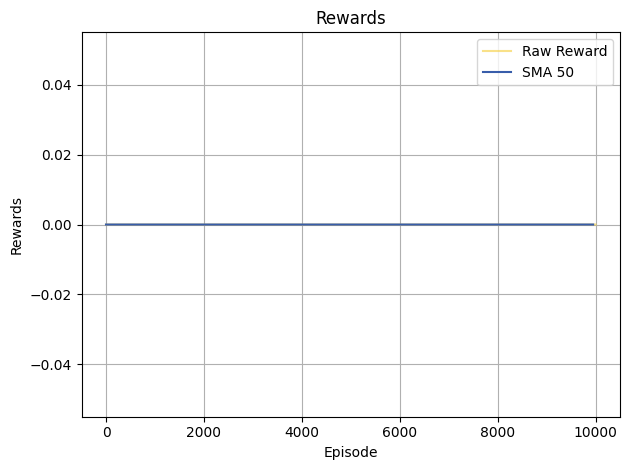

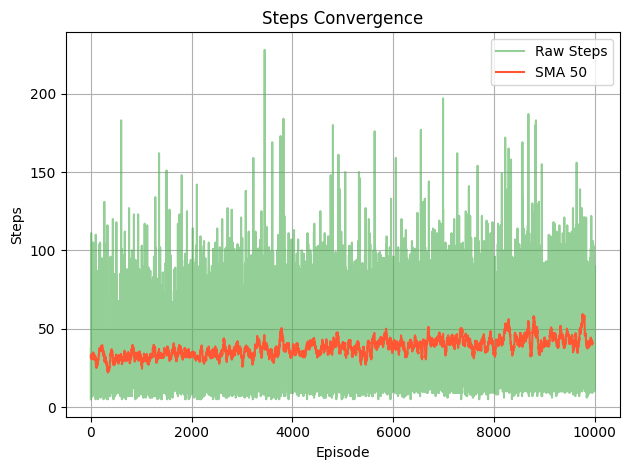

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from agent.base_agent import BaseAgent
from utils import seed_everything


# Q-Learning Agent Class inheriting from Agent
class QLearningAgent(BaseAgent):
    def __init__(self, env, hyperparams):
        """
        Q-Learning Agent class for interacting with the environment and learning
        """
        super(QLearningAgent, self).__init__(env, hyperparams)
        self.Q_table = np.zeros((self.state_dim, self.num_actions))
        
        # Additional hyperparameters
        self.learning_rate = hyperparams['learning_rate']
        self.discount = hyperparams['discount_factor']
        self.epsilon = hyperparams['epsilon_max']
        self.epsilon_min = hyperparams['epsilon_min']
        self.epsilon_decay = hyperparams['epsilon_decay']

    def select_action(self, state):
        """
        Select an action using epsilon-greedy policy
        """
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()  # Explore
        else:
            return np.argmax(self.Q_table[state])  # Exploit

    def learn(self, state, action, reward, next_state, done):
        """
        Learn from a single experience using the Q-learning update rule
        """
        best_next_action = np.argmax(self.Q_table[next_state])
        td_target = reward + self.discount * self.Q_table[next_state, best_next_action] * (1 - done)
        td_error = td_target - self.Q_table[state, action]
        self.Q_table[state, action] += self.learning_rate * td_error

    def update_epsilon(self):
        """
        Update epsilon value for epsilon-greedy policy
        """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def save(self, path):
        """
        Save the trained Q-table
        """
        np.save(path, self.Q_table)

    def load(self, path):
        """
        Load the Q-table
        """
        self.Q_table = np.load(path)

# Trainer Class
class Trainer:
    def __init__(self, env, agent, hyperparams):
        """
        Trainer class to manage training and evaluation of the agent
        """
        self.env = env
        self.agent = agent
        self.hyperparams = hyperparams
        self.reward_history = []
        self.step_history = []

    def train(self):
        """
        Train the agent for a specified number of episodes
        """
        total_steps = 0
        for episode in range(1, self.hyperparams['max_episodes'] + 1):
            state, _ = self.env.reset(seed=seed)  # Remove fixed seed
            done, truncation = False, False
            step_size, episode_reward = 0, 0

            while not done and not truncation:
                # Select and execute an action
                action = self.agent.select_action(state)
                next_state, reward, done, truncation, _ = self.env.step(action)

                # Learn from the experience
                self.agent.learn(state, action, reward, next_state, done)

                state = next_state
                episode_reward += reward
                step_size += 1

            self.reward_history.append(episode_reward)
            self.step_history.append(step_size)  # Track steps for each episode
            total_steps += step_size
            self.agent.update_epsilon()

            # Save the model at specified intervals
            if episode % self.hyperparams['save_interval'] == 0:
                os.makedirs(self.hyperparams['model_dir'], exist_ok=True)
                self.agent.save(os.path.join(self.hyperparams['model_dir'], f'{episode}.npy'))
                print('\n~~~~~~Interval Save: Model saved.\n')

            # Print episode information at specified intervals
            if episode % self.hyperparams['print_interval'] == 0:
                print(f"Episode: {episode}, Total Steps: {total_steps}, Ep Step: {step_size}, Raw Reward: {episode_reward:.2f}, Epsilon: {self.agent.epsilon:.2f}")
        
        # Plot results after training
        self.plot_training(episode)

    def test(self, max_episodes=None):
        """
        Test the trained agent for a specified number of episodes
        """
        # Load the trained Q-table
        self.agent.load(os.path.join(self.hyperparams['model_dir'], f"{self.hyperparams['train_episodes']}.npy"))
        # Set epsilon to 0 to always exploit
        self.agent.epsilon = 0.0

        if max_episodes is None:
            max_episodes = self.hyperparams['max_episodes']

        for episode in range(1, max_episodes + 1):
            state, _ = self.env.reset(seed=seed)
            done, truncation = False, False
            step_size, episode_reward = 0, 0

            while not done and not truncation:
                # Render the environment if desired
                if self.hyperparams['render']:
                    self.env.render()

                # Select an action
                action = self.agent.select_action(state)
                next_state, reward, done, truncation, _ = self.env.step(action)
                state = next_state
                episode_reward += reward
                step_size += 1

            # Print episode information
            print(f"Episode: {episode}, Steps: {step_size}, Reward: {episode_reward:.2f}")

    def plot_training(self, episode):
        """
        Plot the training reward history and step convergence
        """
        # Plot Rewards
        print(sum(self.reward_history))
        sma_window = 50  # Simple Moving Average window
        if len(self.reward_history) >= sma_window:
            sma = np.convolve(self.reward_history, np.ones(sma_window)/sma_window, mode='valid')
        else:
            sma = self.reward_history
        plt.figure()
        plt.title("Rewards")
        plt.plot(self.reward_history, label='Raw Reward', color='#F6CE3B', alpha=0.6)
        plt.plot(range(len(sma)), sma, label=f'SMA {sma_window}', color='#385DAA')
        plt.xlabel("Episode")
        plt.ylabel("Rewards")
        plt.legend()
        if episode == self.hyperparams['max_episodes']:
            os.makedirs(self.hyperparams['plot_dir'], exist_ok=True)
            plt.savefig(os.path.join(self.hyperparams['plot_dir'], 'reward_plot.png'), format='png', dpi=600, bbox_inches='tight')
        plt.tight_layout()
        plt.grid(True)
        plt.show()
        plt.clf()
        plt.close()

        # Plot Steps Convergence
        if len(self.step_history) >= sma_window:
            sma_steps = np.convolve(self.step_history, np.ones(sma_window)/sma_window, mode='valid')
        else:
            sma_steps = self.step_history
        plt.figure()
        plt.title("Steps Convergence")
        plt.plot(self.step_history, label='Raw Steps', color='#4CAF50', alpha=0.6)
        plt.plot(range(len(sma_steps)), sma_steps, label=f'SMA {sma_window}', color='#FF5733')
        plt.xlabel("Episode")
        plt.ylabel("Steps")
        plt.legend()
        if episode == self.hyperparams['max_episodes']:
            plt.savefig(os.path.join(self.hyperparams['plot_dir'], 'steps_plot.png'), format='png', dpi=600, bbox_inches='tight')
        plt.tight_layout()
        plt.grid(True)
        plt.show()
        plt.clf()
        plt.close()

# Main Function to Set Up and Train/Test the Model
if __name__ == "__main__":
    method_name = "q_learning"
    train_mode = True

    train_episodes = 10000
    render = not train_mode
    map_size = 8  # Start with 4x4 map
    seed = 0

    # Config paths and hyperparameters
    config = {
        "train_mode": train_mode,
        "model_dir": f'output/{method_name}/model/{map_size}x{map_size}/',
        "plot_dir": f'output/{method_name}/plt/{map_size}x{map_size}/', 
        "save_interval": 5000,
        "print_interval": 500,
        "learning_rate": 0.05,
        "discount_factor": 0.99,
        "max_episodes": train_episodes if train_mode else 10,
        "train_episodes": train_episodes,
        "max_steps": 1000,
        "render": render,
        "epsilon_max": 1.0 if train_mode else -1,
        "epsilon_min": 0.1,
        "epsilon_decay": 0.9999,
        "map_size": map_size,
        "render_fps": 6,
    }

    # Set seed
    seed_everything(seed)

    # Create environment
    env = gym.make(
        'FrozenLake-v1',
        map_name=f"{config['map_size']}x{config['map_size']}",
        is_slippery=True,
        max_episode_steps=config['max_steps'],
        render_mode="human" if config['render'] else None
    )
    env.reset(seed=seed)
    env.action_space.seed(seed)
    env.metadata['render_fps'] = config['render_fps']

    # Create agent and trainer
    agent = QLearningAgent(env, config)
    trainer = Trainer(env, agent, config)

    # Train or test
    if config['train_mode']:
        trainer.train()
    else:
        trainer.test()
